A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px 
import plotly.io as pio

ModuleNotFoundError: No module named &#39;plotly&#39;

In [36]:
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


Las columnas que expresan un valor en porcentaje son tipo object (string debido al simbolo %). Para poder trabajar con ellas eliminaré el simbolo % y las convertire a float64.

In [52]:
df1= df.copy()

In [53]:
columns_average =["Shooting Accuracy","% Goals-to-shots", "Passing Accuracy","Saves-to-shots ratio"]
for elem in columns_average:
    df1[elem] = df1[elem].map(lambda x: str(x)[:-1])    
    df1[elem] = df1[elem].astype(float)
    #df_1[elem] = pd.to_numeric(df_1[elem], errors='coerce')
#df_1["Shooting Accuracy"] = df_1["Shooting Accuracy"].map(lambda x: str(x)[:-1])

In [56]:
df1.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [57]:
df1.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

In [61]:

df_corr = df1.iloc[:, 1: ] 

In [62]:
df_corr

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,4,13,12,51.9,16.0,32,0,0,0,2,...,13,81.3,41,62,2,9,0,9,9,16
1,4,13,18,41.9,12.9,39,0,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,4,10,10,50.0,20.0,27,1,0,0,3,...,10,66.7,25,38,8,4,0,7,7,15
3,5,11,18,50.0,17.2,40,0,0,0,3,...,22,88.1,43,45,6,5,0,11,11,16
4,3,22,24,37.9,6.5,65,1,0,0,0,...,6,54.6,36,51,5,6,0,11,11,19
5,10,32,32,47.8,15.6,80,2,1,0,2,...,10,62.6,63,49,12,4,0,15,15,17
6,5,8,18,30.7,19.2,32,1,1,1,0,...,13,65.1,67,48,12,9,1,12,12,20
7,6,34,45,43.0,7.5,110,2,0,0,2,...,20,74.1,101,89,16,16,0,18,18,19
8,2,12,36,25.0,4.1,60,2,0,0,0,...,12,70.6,35,30,3,5,0,7,7,15
9,2,15,23,39.4,5.2,48,0,0,0,1,...,6,66.7,48,56,3,7,1,7,7,17


<AxesSubplot:>

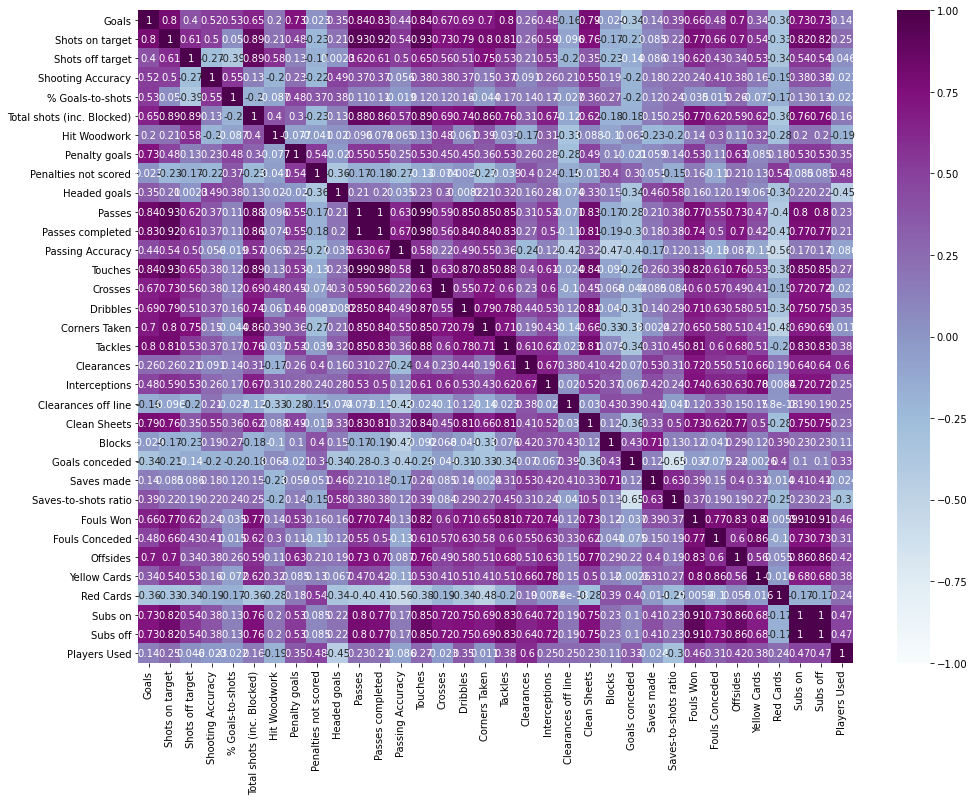

In [64]:
plt.subplots(figsize=(16, 12)) 
sns.heatmap(df_corr.corr(), cmap="BuPu",  annot=True, vmin=-1, vmax=1)

In [24]:
#Pongo como índice el nombre de los equipos
df.set_index('Team',inplace=True)